# Modeling sentiment analysis from yelp dataset

In [3]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV
%matplotlib inline

In [4]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('yelp.csv')

In [5]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 10)


In [6]:
# COLUMN NAMES
print("Column names:")
print(data.columns)

Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [7]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)

Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object


In [9]:
# SEEING FEW OF THE ENTRIES
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
# DATASET SUMMARY
data.describe(include='all')

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,y2z2ITDv-VbeUcjeKWYqeg,NaN,This review is for the chain in general. The l...,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


## Creating of a new column

In [11]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Visualization

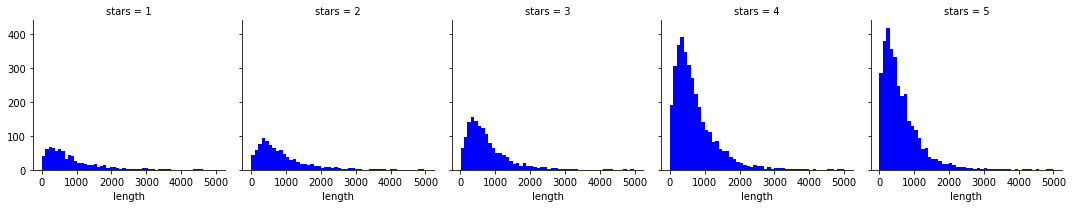

In [12]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

In [13]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


we can see that there is negative correlation between:
* Cool and Useful
* Cool and Funny
* Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.


## Correlation between the voting columns

In [14]:
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


## Classifying the dataset and splitting it into the reviews and stars

In [16]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [17]:
print(data_classes.shape)

(5547, 11)


In [20]:
# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object


In [19]:
print(y.head())

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


## 3)  Data Cleaning

In [21]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## 4) Vectorize

In [22]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))

31336


In [23]:
# Lets check 1st row
r0 = x[0]
print(r0)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [24]:
vocab0 = vocab.transform([r0])
print(vocab0)

  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8521)	1
  (0, 10646)	1
  (0, 10647)	1
  (0, 11128)	2
  (0, 11479)	1
  (0, 11779)	1
  (0, 12206)	2
  (0, 12221)	1
  (0, 12297)	1
  (0, 12386)	1
  (0, 12675)	1
  (0, 12689)	1
  (0, 13135)	1
  (0, 13186)	1
  (0, 14247)	1
  (0, 15385)	1
  (0, 16292)	1
  (0, 16412)	1
  :	:
  (0, 23318)	1
  (0, 23801)	1
  (0, 23902)	1
  (0, 23976)	1
  (0, 24080)	1
  (0, 24177)	1
  (0, 24544)	2
  (0, 24972)	2
  (0, 26383)	1
  (0, 26543)	1
  (0, 26978)	1
  (0, 27029)	1
  (0, 27068)	1
  (0, 28403)	1
  (0, 28735)	1
  (0, 29230)	1
  (0, 29313)	1
  (0, 29620)	1
  (0, 30135)	1
  (0, 30240)	1
  (0, 30471)	1
  (0, 30488)	1
  (0, 30672)	1
  (0, 30854)	1
  (0, 30900)	1


In [29]:
vocab

CountVectorizer(analyzer=<function text_process at 0x0000018FEF8D7F28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [25]:
# As words are now transformed to matrix, we still can read them back if we wish
print("Getting the words back:")
print(vocab.get_feature_names()[19648])
print(vocab.get_feature_names()[10643])

Getting the words back:
hygienist
absence


In [33]:
# from our row 0, we can still see patterns
print(vocab.get_feature_names()[1213])
print(vocab.get_feature_names()[3537])

Anyway
EVERYTHING


## Vectorization of the whole review set and making sparse matrix now

In [34]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457


In [35]:
# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Density of the matrix =  0.17975812697942373


## Splitting the dataset X into training and testing set

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2019)

## 9 Modelling

### 9.1) Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)

In [39]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 71  59  32]
 [  8 165 104]
 [ 14  61 596]]


In [40]:
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))

Score: 74.95


In [41]:
print("Classification Report:",classification_report(y_test,predmnb))

Classification Report:               precision    recall  f1-score   support

           1       0.76      0.44      0.56       162
           3       0.58      0.60      0.59       277
           5       0.81      0.89      0.85       671

   micro avg       0.75      0.75      0.75      1110
   macro avg       0.72      0.64      0.66      1110
weighted avg       0.75      0.75      0.74      1110



### 9.2) Random Forest Classifier

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 46  37  79]
 [ 14 111 152]
 [  8  66 597]]


In [44]:
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))

Score: 67.93


In [45]:
print("Classification Report:",classification_report(y_test,predrmfr))

Classification Report:               precision    recall  f1-score   support

           1       0.68      0.28      0.40       162
           3       0.52      0.40      0.45       277
           5       0.72      0.89      0.80       671

   micro avg       0.68      0.68      0.68      1110
   macro avg       0.64      0.52      0.55      1110
weighted avg       0.66      0.68      0.65      1110



## 9.3) Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

In [47]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 63  43  56]
 [ 33 121 123]
 [ 46  96 529]]


In [48]:
print("Score:",round(accuracy_score(y_test,preddt)*100,2))

Score: 64.23


In [49]:
print("Classification Report:",classification_report(y_test,preddt))

Classification Report:               precision    recall  f1-score   support

           1       0.44      0.39      0.41       162
           3       0.47      0.44      0.45       277
           5       0.75      0.79      0.77       671

   micro avg       0.64      0.64      0.64      1110
   macro avg       0.55      0.54      0.54      1110
weighted avg       0.63      0.64      0.64      1110



## 9.4 )Support Vector Machines

In [50]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[  0   0 162]
 [  0   0 277]
 [  0   0 671]]


In [52]:
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))

Score: 60.45


In [53]:
print("Classification Report:",classification_report(y_test,predsvm))

Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       277
           5       0.60      1.00      0.75       671

   micro avg       0.60      0.60      0.60      1110
   macro avg       0.20      0.33      0.25      1110
weighted avg       0.37      0.60      0.46      1110



C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 9.5) Gradient Boosting Classifier

In [55]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=2019)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)

In [56]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 62  35  65]
 [ 11 140 126]
 [  6  28 637]]


In [57]:
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))

Score: 75.59


In [58]:
print("Classification Report:",classification_report(y_test,predgbi))

Classification Report:               precision    recall  f1-score   support

           1       0.78      0.38      0.51       162
           3       0.69      0.51      0.58       277
           5       0.77      0.95      0.85       671

   micro avg       0.76      0.76      0.76      1110
   macro avg       0.75      0.61      0.65      1110
weighted avg       0.75      0.76      0.73      1110



In [59]:
#keeping minimum range
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=2019)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)

In [60]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 44  23  95]
 [  5 103 169]
 [  4  23 644]]


In [61]:
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))

Score: 71.26


In [62]:
print("Classification Report:",classification_report(y_test,predgbi))

Classification Report:               precision    recall  f1-score   support

           1       0.83      0.27      0.41       162
           3       0.69      0.37      0.48       277
           5       0.71      0.96      0.82       671

   micro avg       0.71      0.71      0.71      1110
   macro avg       0.74      0.53      0.57      1110
weighted avg       0.72      0.71      0.67      1110



In [ ]:
#keeping maximum range
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=2019)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)

In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))

In [ ]:
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))

In [ ]:
print("Classification Report:",classification_report(y_test,predgbi))

### 9.6)  K - Nearest Neighbor Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

In [64]:
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[  7  10 145]
 [  6  20 251]
 [  4  11 656]]


In [65]:
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))

Score:  61.53


In [66]:
print("Classification Report:")
print(classification_report(y_test,predknn))

Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.04      0.08       162
           3       0.49      0.07      0.13       277
           5       0.62      0.98      0.76       671

   micro avg       0.62      0.62      0.62      1110
   macro avg       0.51      0.36      0.32      1110
weighted avg       0.56      0.62      0.50      1110



### 9.7) XGBoost Classifier

In [67]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)

In [68]:
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[ 51  26  85]
 [  5 116 156]
 [  2  24 645]]


In [69]:
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))

Score:  73.15


In [70]:
print("Classification Report:")
print(classification_report(y_test,predxgb))

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.31      0.46       162
           3       0.70      0.42      0.52       277
           5       0.73      0.96      0.83       671

   micro avg       0.73      0.73      0.73      1110
   macro avg       0.77      0.56      0.61      1110
weighted avg       0.74      0.73      0.70      1110



### 9.8)  MULTILAYER PERCEPTRON CLASSIFIER

In [72]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)

In [73]:
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 89  44  29]
 [ 25 152 100]
 [ 10  70 591]]


In [74]:
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))

Score: 74.95


In [75]:
print("Classification Report:")
print(classification_report(y_test,predmlp))

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.55      0.62       162
           3       0.57      0.55      0.56       277
           5       0.82      0.88      0.85       671

   micro avg       0.75      0.75      0.75      1110
   macro avg       0.70      0.66      0.68      1110
weighted avg       0.74      0.75      0.74      1110



* Multilayer Perceptron = 75.05%
* Multinomial Naive Bayes = 74.95%
* Gradient Boosting Classifier = 71.06%
* XGBoost Classifier = 73.15%
* Random Forest Classifier = 67.93%
* Decision Tree = 64.23%
* K Neighbor Classifier = 61.53%
* Support Vector Machine  = 60.53%

## Validation

Since **multilayer perceptron classifier** has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

## a) POSITIVE REVIEW

In [76]:
pr = data['text'][0]
print(pr)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

In [77]:
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

Actual Rating:  5
Predicted Rating:


5

## b) AVERAGE REVIEW

In [78]:
ar = data['text'][16]
print(ar)

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

In [79]:
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

Actual Rating:  3
Predicted Rating:


3

## c) NEGATIVE REVIEW

In [80]:
nr = data['text'][16]
print(nr)

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

In [81]:
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

Actual Rating:  1
Predicted Rating:


3

**We were right about positive and average reviews. We predicted negative rating as average though**

In [82]:
count = data['stars'].value_counts()
print(count)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


From the above, we can see that predictions are biased towards positive reviews. We can see that the dataset has more positive reviews as compared to negative reviews. 
One way to fix this biaseness issue is by normalizing the dataset to have equal number of reviews - thereby removing the bias.